In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
#from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

#from skopt.space import Real, Integer
#from skopt.utils import use_named_args
#from skopt import gp_minimize
#from skopt.plots import plot_convergence

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from scipy import stats
#from fitter import Fitter
#, get_common_distributions

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [11]:
url_train = 'https://raw.githubusercontent.com/SantiagoTadini/TP2-Datos/main/Features/data_train.csv'
url_test = 'https://raw.githubusercontent.com/SantiagoTadini/TP2-Datos/main/Features/data_test.csv'

data_train = pd.read_csv(url_train) #se usa para entrenar el modelo
data_test = pd.read_csv(url_test) #se usa para predecir

In [12]:
data_train.head(4)

ID    Region  Territory  Pricing, Delivery_Terms_Quote_Appr  \
0  12714  0.530258   0.318486                                   0   
1  18684  0.583205   0.385321                                   1   
2  20675  0.455886   0.623718                                   1   
3  20682  0.455886   0.623718                                   1   

   Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
0                                 0                             0   
1                                 1                             1   
2                                 0                             1   
3                                 0                             1   

   Bureaucratic_Code_0_Approved  Bureaucratic_Code  Account_Created_Date  \
0                             0           0.657924                735076   
1                             1           0.500000                735255   
2                             0           0.267319                735102   
3                             0           0.267319                735102   

     Source  ...  Month  Delivery_Quarter  Delivery_Year  TRF  \
0  0.576476  ...     10          0.629657           2018    2   
1  0.506024  ...      5          0.569297           2016   20   
2  0.576476  ...      8          0.550236           2016    0   
3  0.576476  ...      7          0.550236           2016    0   

   Total_Amount_Currency  Total_Amount  Total_Taxable_Amount_Currency  \
0               0.538103      662287.5                       0.536537   
1               0.490643     9803430.0                       0.491718   
2               0.490643      170931.6                       0.491718   
3               0.490643      170931.6                       0.491718   

   Total_Taxable_Amount  USD_Total_Amount  Target  
0              662287.5         777856.67       0  
1             9803430.0        9803430.00       0  
2              341863.2         170931.60       0  
3              341863.2         170931.60       0  

[4 rows x 46 columns]

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16883 entries, 0 to 16882
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16883 non-null  int64  
 1   Region                              16883 non-null  float64
 2   Territory                           16883 non-null  float64
 3   Pricing, Delivery_Terms_Quote_Appr  16883 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16883 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16883 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16883 non-null  int64  
 7   Bureaucratic_Code                   16883 non-null  float64
 8   Account_Created_Date                16883 non-null  int64  
 9   Source                              16883 non-null  float64
 10  Billing_Country                     16883 non-null  float64
 11  Account_Name                        16883

In [15]:
# Dimensiones del dataset
# ==============================================================================
data_train.shape

(16883, 46)

In [16]:
# Número de datos ausentes por variable
# ==============================================================================
data_train.isna().sum().sort_values()

ID                                        0
Product_Category_B                        0
Currency                                  0
Quote_Expiry_Date                         0
Last_Modified_Date                        0
Last_Modified_By                          0
Product_Family                            0
Product_Name                              0
ASP_Currency                              0
Planned_Delivery_Start_Date               0
Planned_Delivery_End_Date                 0
Month                                     0
Delivery_Quarter                          0
Delivery_Year                             0
TRF                                       0
Total_Amount_Currency                     0
Total_Taxable_Amount_Currency             0
Total_Taxable_Amount                      0
Product_Type                              0
Brand                                     0
Size                                      0
Delivery_Terms                            0
Region                          

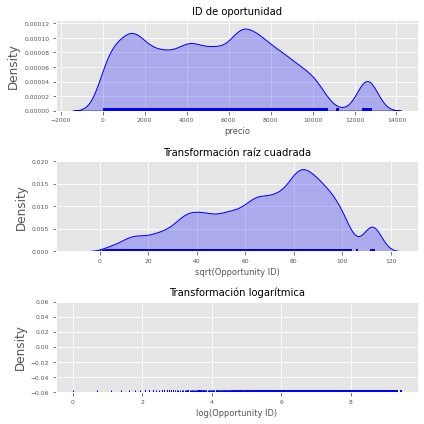

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    data_train.Opportunity_ID,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("ID de oportunidad", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(data_train.Opportunity_ID),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Opportunity ID)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(data_train.Opportunity_ID),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Opportunity ID)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [23]:
X = train.drop('Stage', axis=1).values
X

array([[27761, 'EMEA', 'None', ..., 'EUR', 5272800.0,
        'Prod_Category_A_None'],
       [27760, 'EMEA', 'None', ..., 'EUR', 48230.0,
        'Prod_Category_A_None'],
       [27446, 'Americas', 'NW America', ..., 'USD', 83865.6,
        'Prod_Category_A_None'],
       ...,
       [8792, 'EMEA', 'Austria', ..., 'EUR', 299715.0,
        'Prod_Category_A_None'],
       [28561, 'Americas', 'NE America', ..., 'USD', 0.0,
        'Prod_Category_A_None'],
       [28318, 'Americas', 'NE America', ..., 'USD', 0.0,
        'Prod_Category_A_None']], dtype=object)

In [24]:
y = train['Stage'].values
y

array(['Closed Lost', 'Closed Won', 'Closed Won', ..., 'Closed Won',
       'Closed Lost', 'Closed Lost'], dtype=object)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)